# Buffer Stock Model

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt


# load the BufferStockModel module
from BufferStockModel import BufferStockModelClass

# for timing
from consav.misc import elapsed

nb.set_num_threads(1) # use a single thread for clarity

# Solve with EGM

Load Buffer Stock Model to be solved with NEGM:

In [2]:
model_negm = BufferStockModelClass(name='baseline',par={'solmethod':'egm'})

Solve the model with NEGM:

In [3]:
model_negm.solve()

 t = 59 solved in 1.9 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 8.6 secs (w: 6.0 secs)
 t = 58 solved in 0.7 secs (w: 0.7 secs)
 t = 58 solved in 0.7 secs (w: 0.7 secs)
 t = 57 solved in 0.7 secs (w: 0.7 secs)
 t = 57 solved in 0.7 secs (w: 0.7 secs)
 t = 57 solved in 0.7 secs (w: 0.7 secs)
 t = 56 solved in 0.7 secs (w: 0.7 secs)
 t = 56 solved in 0.8 secs (w: 0.8 secs)
 t = 56 solved in 0.9 secs (w: 0.9 secs)
 t = 55 solved in 0.8 secs (w: 0.8 secs)
 t = 55 solved in 0.7 secs (w: 0.7 secs)
 t = 55 solved in 0.8 secs (w: 0.8 secs)
 t = 54 solved in 0.8 secs (w: 0.8 secs)
 t = 54 solved in 0.7 secs (w: 0.7 secs)
 t = 54 solved in 0.7 secs (w: 0.7 secs)
 t = 53 solved in 0.7 secs (w: 0.7 secs)
 t = 53 solved in 0.7 secs (w: 0.7 secs)
 t = 53 solved in 0.7 secs (w: 0.7 secs)
 t = 52 solved in 0.7 secs (w: 0.7 secs)
 t = 52 solved in 0.7 secs (w: 0.7 secs)
 t = 52 solved in 0.7 secs (w: 0.7 secs)
 t = 51 solved in 0.7 secs (w: 0.7 secs)
 t = 51 solved in

Simulate NEGM-solved model with updated simulate function `simulate_rand`, that assigns different beta values to households:

In [4]:
model_negm.simulate()

model simulated in 3.2 secs


In [5]:
model_negm.simulate_rand()

model simulated in 2.9 secs


Plot lifecycles of model solved with NEGM:

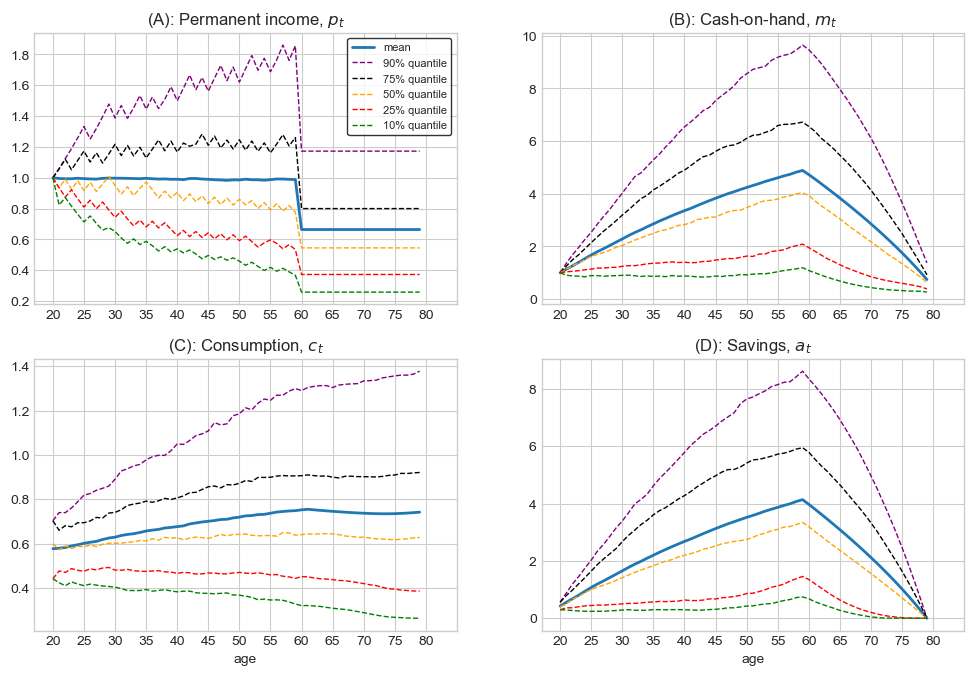

In [6]:
model_negm.lifecycle()

## Various checks

Below checks simulation values for different values of beta (households):

In [7]:
# This saves simualtes the model and put simulation results in model.sim
model_negm.simulate()

model simulated in 0.0 secs


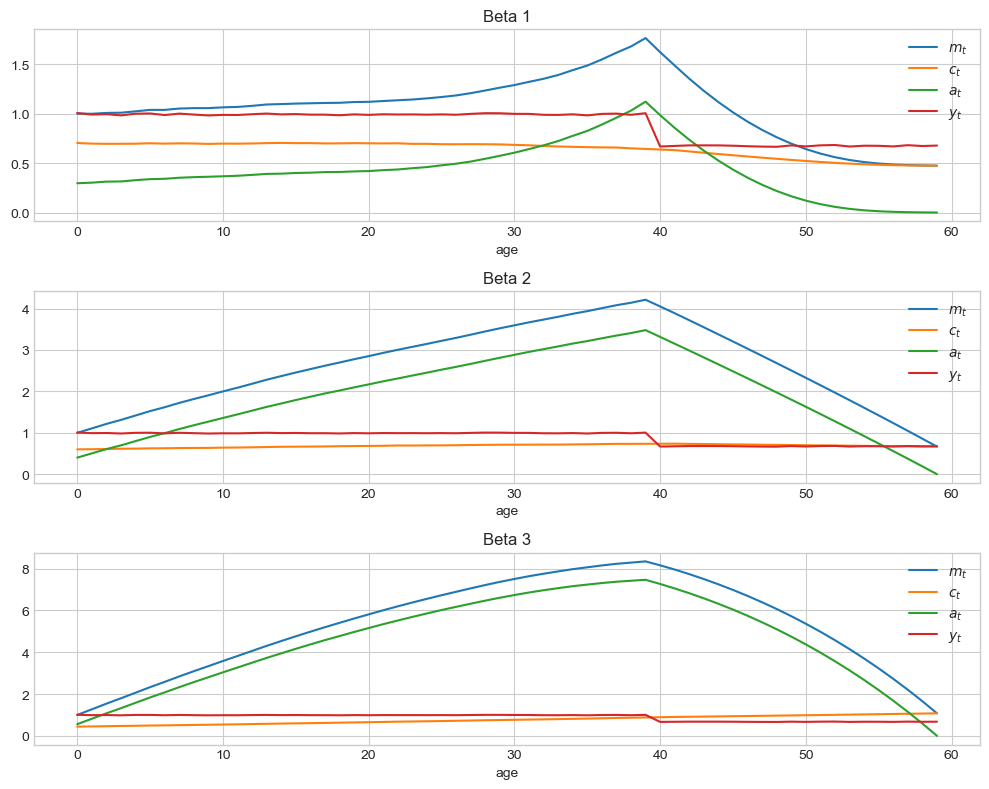

In [8]:
model_negm.beta_check()

In a single graph:

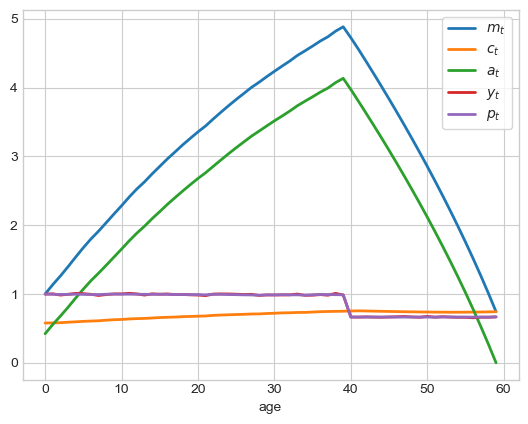

In [9]:
model_negm.beta_check_simple()

# Tax shocks

## Transitory Anticipated Tax Increase

Create a copy of the original model solve with NEGM and implement anticipated transitory tax increase in period 21:

In [10]:
model_negm_trans10pct = model_negm.copy()
model_negm_trans10pct.par.tax_rate_vec[20] = model_negm.par.tax_rate_vec[20]*1.1

Check tax array to see that a transitory shock has been implemented:

In [11]:
# ensuring tax has hikened
model_negm_trans10pct.par.tax_rate_vec

array([0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.33, 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 ])

Solve and simulate new model with anticipated transitory shock (using ´simulate_rand´ that assigns different beta values to different households): 

In [12]:
model_negm_trans10pct.solve()
model_negm_trans10pct.simulate()
model_negm_trans10pct.simulate_rand()

 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 0.9 secs (w: 0.9 secs)
 t = 58 solved in 1.2 secs (w: 1.2 secs)
 t = 58 solved in 0.9 secs (w: 0.9 secs)
 t = 57 solved in 0.9 secs (w: 0.9 secs)
 t = 57 solved in 0.9 secs (w: 0.8 secs)
 t = 57 solved in 0.9 secs (w: 0.8 secs)
 t = 56 solved in 0.7 secs (w: 0.7 secs)
 t = 56 solved in 0.7 secs (w: 0.7 secs)
 t = 56 solved in 0.7 secs (w: 0.7 secs)
 t = 55 solved in 0.9 secs (w: 0.9 secs)
 t = 55 solved in 1.2 secs (w: 1.2 secs)
 t = 55 solved in 1.8 secs (w: 1.7 secs)
 t = 54 solved in 1.2 secs (w: 1.1 secs)
 t = 54 solved in 2.5 secs (w: 2.4 secs)
 t = 54 solved in 1.4 secs (w: 1.4 secs)
 t = 53 solved in 0.8 secs (w: 0.8 secs)
 t = 53 solved in 0.8 secs (w: 0.7 secs)
 t = 53 solved in 0.7 secs (w: 0.7 secs)
 t = 52 solved in 0.8 secs (w: 0.8 secs)
 t = 52 solved in 0.7 secs (w: 0.7 secs)
 t = 52 solved in 0.7 secs (w: 0.7 secs)
 t = 51 solved in 0.7 secs (w: 0.7 secs)
 t = 51 solved in

/var/folders/qc/t65gjfgx5dq1dyhtrhctn2q80000gn/T/ipykernel_86290/1541178690.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


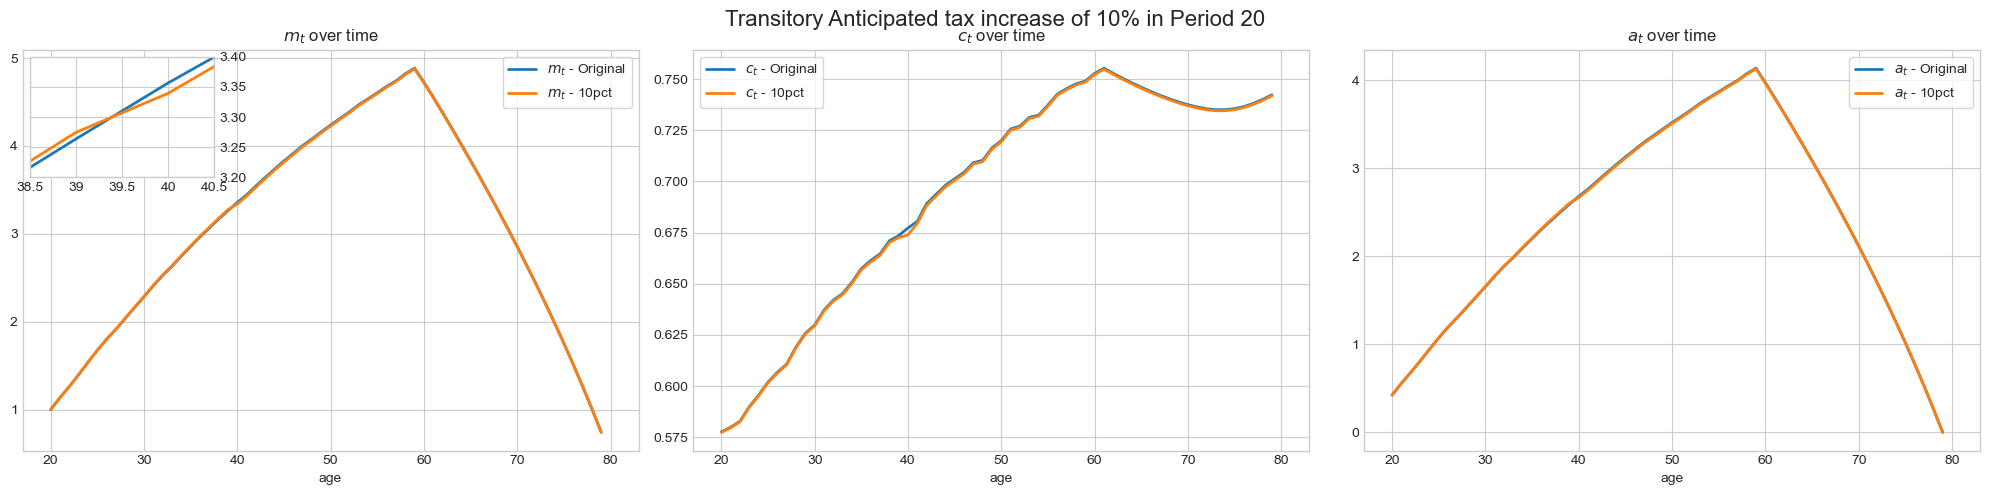

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_trans10pct = model_negm_trans10pct.sim

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Transitory Anticipated tax increase of 10% in Period 20", fontsize=16)

age = np.arange(par.T)

for i, (simvar, simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar+'_rand')
    simdata_trans10pct = getattr(sim_trans10pct, simvar+'_rand')
    axs[i].plot(age, np.mean(simdata, axis=1), lw=2, label=f'{simvarlatex} - Original')
    axs[i].plot(age, np.mean(simdata_trans10pct, axis=1), lw=2, label=f'{simvarlatex} - 10pct')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

    # create zoom-in inset plot on the first graph
    if i == 0:
        axins = inset_axes(axs[i], width="30%", height="30%", loc='upper left')  # adjust size and position as needed
        axins.plot(age, np.mean(simdata, axis=1), lw=2)
        axins.plot(age, np.mean(simdata_trans10pct, axis=1), lw=2)

        # specify the limits for the zoomed-in plot
        axins.set_xlim(18.5, 20.5)
        axins.set_ylim(3.2,3.4)  # adjust as needed

        # Move labels to right
        axins.yaxis.tick_right()
        axins.yaxis.set_label_position("right")

        # Change x-axis labels for inset axes to show 20 years later
        xticks = axins.get_xticks()
        new_xticks = xticks + 20
        axins.set_xticks(xticks[::2])  # Keep every other tick
        axins.set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks[::2]])  # Apply the same slicing to the labels

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()


## Permanent Anticipated Tax Increase

Create a copy of the original model solve with NEGM and anticipated permanent tax increase in period 21:

In [14]:
model_negm_10pct = model_negm.copy()
model_negm_10pct.par.tax_rate_vec[20:] = model_negm.par.tax_rate_vec[20:]*1.1

Check tax array to see that a permanent increase has been implemented:

In [15]:
model_negm_10pct.par.tax_rate_vec

array([0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33])

Solve and simulate new model with permanent shock (using ´simulate_rand´ that assigns different beta values to different households): 

In [16]:
model_negm_10pct.solve()
model_negm_10pct.simulate()
model_negm_10pct.simulate_rand()

 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 0.9 secs (w: 0.8 secs)
 t = 58 solved in 2.7 secs (w: 2.6 secs)
 t = 58 solved in 2.8 secs (w: 2.8 secs)
 t = 57 solved in 2.6 secs (w: 2.5 secs)
 t = 57 solved in 1.9 secs (w: 1.9 secs)
 t = 57 solved in 4.0 secs (w: 3.9 secs)
 t = 56 solved in 2.7 secs (w: 2.7 secs)
 t = 56 solved in 2.2 secs (w: 2.1 secs)
 t = 56 solved in 2.3 secs (w: 2.3 secs)
 t = 55 solved in 2.3 secs (w: 2.3 secs)
 t = 55 solved in 2.2 secs (w: 2.1 secs)
 t = 55 solved in 0.9 secs (w: 0.9 secs)
 t = 54 solved in 0.9 secs (w: 0.9 secs)
 t = 54 solved in 2.6 secs (w: 2.5 secs)
 t = 54 solved in 2.8 secs (w: 2.8 secs)
 t = 53 solved in 1.7 secs (w: 1.6 secs)
 t = 53 solved in 3.0 secs (w: 2.9 secs)
 t = 53 solved in 2.7 secs (w: 2.7 secs)
 t = 52 solved in 1.2 secs (w: 1.2 secs)
 t = 52 solved in 1.4 secs (w: 1.4 secs)
 t = 52 solved in 1.8 secs (w: 1.7 secs)
 t = 51 solved in 1.8 secs (w: 1.7 secs)
 t = 51 solved in

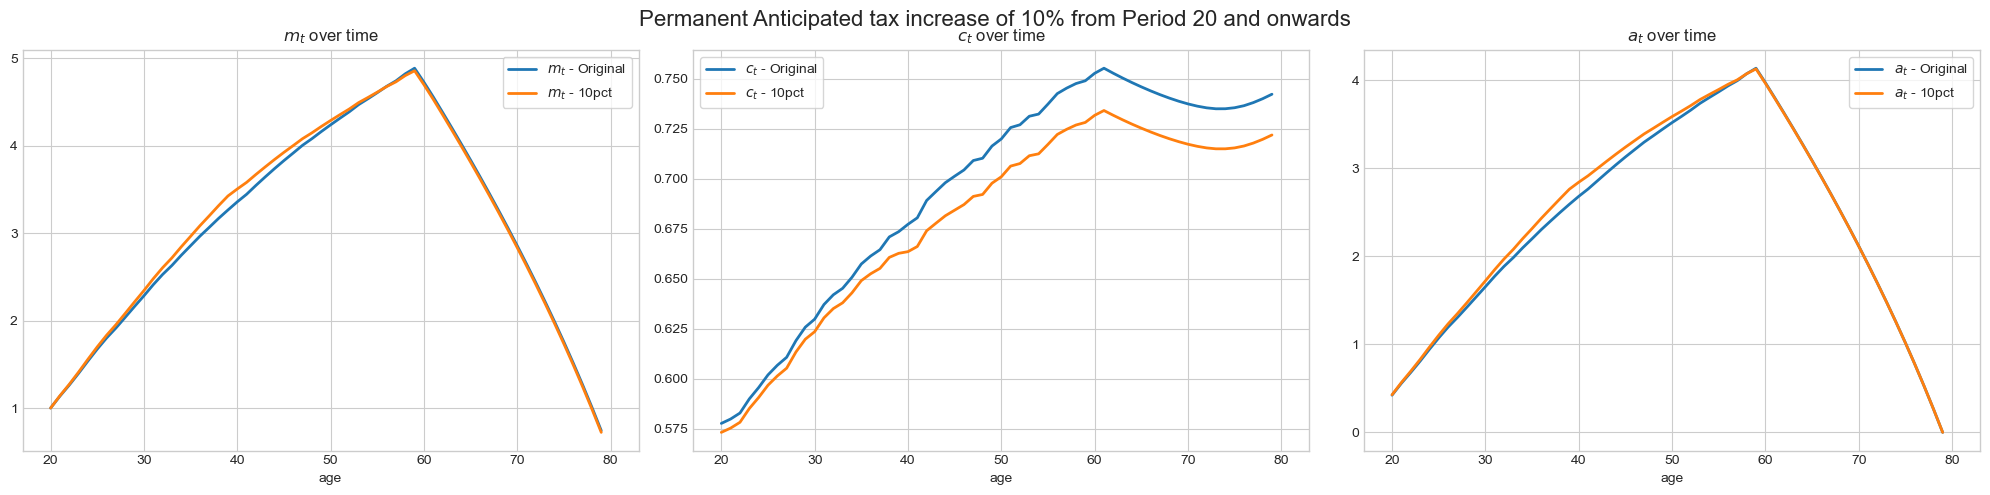

In [17]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_10pct = model_negm_10pct.sim

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Anticipated tax increase of 10% from Period 20 and onwards", fontsize=16)

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim,simvar+'_rand')
    simdata_10pct = getattr(sim_10pct,simvar+'_rand')
    axs[i].plot(age,np.mean(simdata,axis=1),lw=2,label=f'{simvarlatex} - Original')
    axs[i].plot(age,np.mean(simdata_10pct,axis=1),lw=2,label=f'{simvarlatex} - 10pct')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

## Uanticipated Tax Increase

Create a copy of the original model solve with NEGM and *unanticipated* permanent tax increase in period 21:

In [18]:
model_unanticipated10pt = model_negm.copy()

Replace the periods after 20 from the old_tax simulation with the new_tax simulation

In [19]:
for var in ['m', 'c', 'a']:
    sim_old = getattr(model_negm.sim, var+'_rand')
    sim_new = getattr(model_negm_10pct.sim, var+'_rand')
    sim_combined = np.copy(sim_old)  # Create a copy of the old simulation
    sim_combined[20:] = sim_new[20:]  # Replace the periods after 20 with the new simulation

    # Set the combined simulation in the original model
    setattr(model_unanticipated10pt.sim, f'{var}_rand', sim_combined)

Checking They Jump to Correct (New) Optimal Path:

In [20]:
print(
    model_negm.sim.c_rand[10,0]
    ,model_unanticipated10pt.sim.c_rand[10,0]
    ,model_unanticipated10pt.sim.c_rand[30,0]
    ,model_negm_10pct.sim.c_rand[30,0]
)

0.30291422148607333 0.30291422148607333 0.4523592561974992 0.4523592561974992


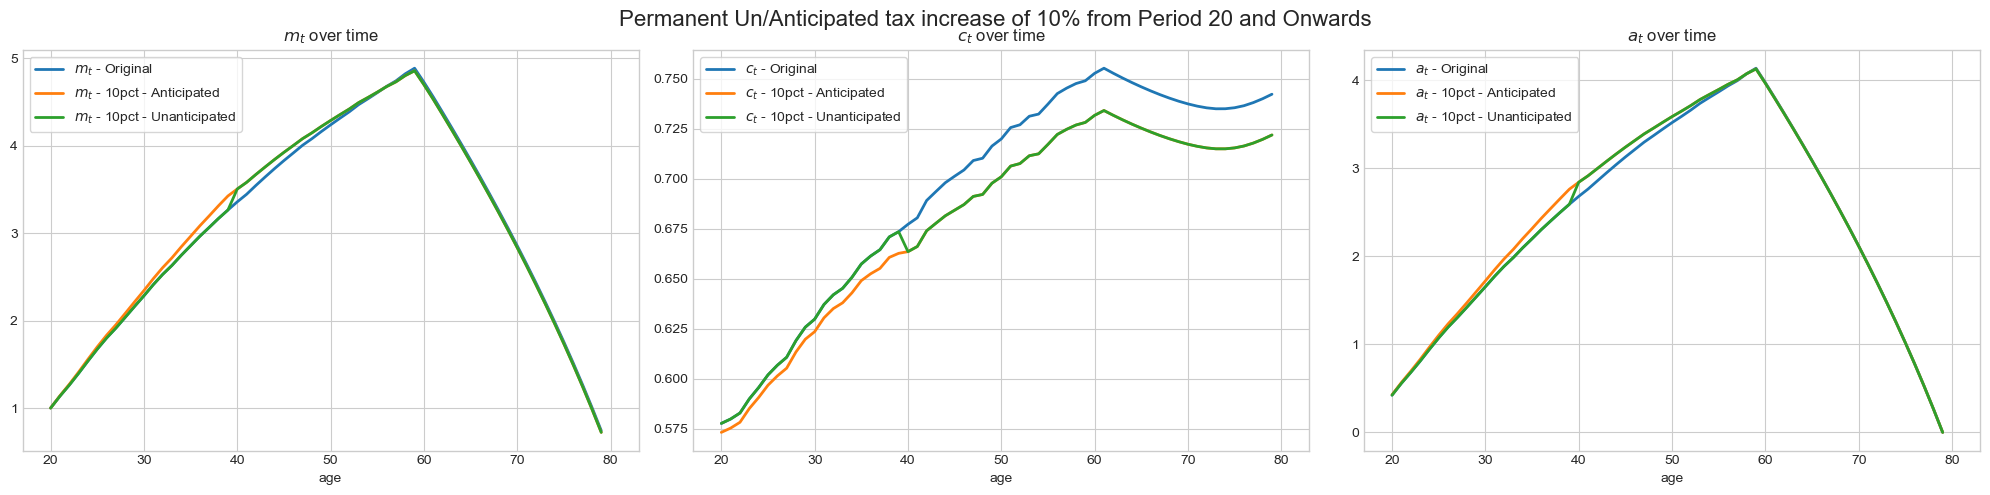

In [21]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_10pct = model_negm_10pct.sim
sim_unanticipated = model_unanticipated10pt.sim

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Un/Anticipated tax increase of 10% from Period 20 and Onwards", fontsize=16)

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar+'_rand')
    simdata_10pct = getattr(sim_10pct, simvar+'_rand')
    simdata_unanticipated = getattr(sim_unanticipated, simvar+'_rand')  # data from combined model

    axs[i].plot(age, np.mean(simdata, axis=1), lw=2, label=f'{simvarlatex} - Original')
    axs[i].plot(age, np.mean(simdata_10pct, axis=1), lw=2, label=f'{simvarlatex} - 10pct - Anticipated')
    axs[i].plot(age, np.mean(simdata_unanticipated, axis=1), lw=2, label=f'{simvarlatex} - 10pct - Unanticipated')  # plot combined data

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

    # Change x-axis labels to show 20 years later
    xticks = axs[i].get_xticks()
    axs[i].set_xticks(xticks)  # Set tick positions, this line is actually redundant here because it's the same as before
    new_xticks = xticks + 20
    axs[i].set_xticklabels([int(val) if val.is_integer() else val for val in new_xticks])
    axs[i].set_xlim(-3, 63)

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()